In [9]:
import pymolpro
import random
import numpy as np
import pandas as pd
import os
import math
def chkorbid(o1,o2):
    if o1.startswith('-'):
        chko1=o1[1:]
    else:
        chko1=o1
    if o2.startswith('-'):
        chko2=o2[1:]
    else:
        chko2=o2
    if chko1==chko2:
        return True
    else: 
        return False

def distances(o1,o2):
    big_arr=np.empty((0,n**3))
    for i in range(len(grid_dt[o1])):
        tmp_list=[]
        for j in range(len(grid_dt[o2])):
            #find the distance
            o1x,o1y,o1z = grid_dt[o1][i]['x'], grid_dt[o1][i]['y'],grid_dt[o1][i]['z']
            o2x,o2y,o2z = grid_dt[o2][j]['x'], grid_dt[o2][j]['y'],grid_dt[o2][j]['z']
            r=math.sqrt((o1x-o2x)**2+(o1y-o2y)**2+(o1z-o2z)**2)
            #correlation energy should scale like r^-6 so take the reciprocal, going to lead to problems at 0 so take an error function
            if r==0:
                w=1
            else:   
                w=(math.erf(a*r)/r)**6
            tmp_list.append(float(w))
        tmp_arr=np.array(tmp_list)
        tmp_arr.reshape((1,len(tmp_list)))
        big_arr=np.vstack((big_arr,tmp_arr))
    
    return big_arr

def orbitalsize(orbital):
    return math.sqrt(sum([orbital.local_second_moments[i][i] for i in range(3)]))


def density_arrays(oid1,oid2):
    
    o1_addft=[float(v) for v in orbital_dt[oid1].values()]
    o2_addft=[float(v) for v in orbital_dt[oid2].values()]
    
    tmp=[float(grid_dt[oid1][i]['d']) for i in range(len(grid_dt[oid1]))]
    tmp=np.array(tmp)
    tmp=np.reshape(tmp,(1,len(grid_dt[oid1])))
    while len(o1_addft)<n**3:
        o1_addft.append(0)
    o1_addft=np.array(o1_addft)
    o1_addft=np.reshape(o1_addft,(1,len(grid_dt[oid1])))
    o1_arr=np.vstack((o1_addft,tmp))
    
    
    tmp=[grid_dt[oid2][i]['d'] for i in range(len(grid_dt[oid2]))]
    tmp=np.array(tmp)
    tmp=np.reshape(tmp,(1,len(grid_dt[oid2])))
    
    while len(o2_addft)<n**3:
        o2_addft.append(0)
    o2_addft=np.array(o2_addft)
    o2_addft=np.reshape(o2_addft,(1,len(grid_dt[oid2])))
    o2_arr=np.vstack((o2_addft,tmp))
    
    return np.vstack((distances(oid1,oid2),o1_arr,o2_arr))
    



def array_former(distance_list,features_list):
    
    zero_array=np.zeros((len(distance_list)-len(features_list),1))
    feature_array=np.array(features_list)
    feature_array=np.reshape(feature_array,(len(features_list),1))
    ft=np.vstack((features_list,zero_array))
    distance_array=np.array(distance_list)
    distance_array=np.reshape(distance_array,(len(distance_list),1))
    return np.hstack((distance_array,ft))
    

In [13]:
geo_dt={'c2h4':
"""
C       0.04632      0.04634      0.04646
C       0.81955      0.81957      0.81969
H       0.27329     -1.00259     -0.09726
H      -0.82445      0.45146     -0.45360
H       0.59258      1.86847      0.96342
H       1.69029      0.41441      1.31974
""",
'c2h6':
"""
C       0.00000      0.00000      0.00000
C       0.86603      0.86603      0.86603
H      -0.63000     -0.63000      0.63000
H      -0.63000      0.63000     -0.63000
H       0.63000     -0.63000     -0.63000
H       0.23098      1.50113      1.50113
H       1.50113      1.50113      0.23098
H       1.50113      0.23098      1.50113
""",
'ch4':
"""
C       0.00000      0.00000      0.00000
H       0.63000      0.63000      0.63000
H      -0.63000     -0.63000      0.63000
H      -0.63000      0.63000     -0.63000
H       0.63000     -0.63000     -0.63000
""",
'eth':
"""
C      -0.99938      0.05528     -0.19066
H      -1.29704     -0.53094      0.68003
H      -1.80029      0.75402     -0.46015
H      -0.81007     -0.61059     -1.03427
C       0.25224      0.81254      0.13010
O       0.27383      2.00682      0.37623
H       1.17169      0.20423      0.18495
""",
'hcn':
"""
C       0.09831      0.11533      0.10364
N       0.78613      0.74869      0.78990
H      -0.53370     -0.46664     -0.52692
"""}




In [15]:
p_list=[]
for k,v in geo_dt.items():
    p=pymolpro.Project(name=f'{k}')
    p.write_input(f"""
    geometry={{{v}}}
    basis, cc-pvtz
    print orbital
    rhf
    locali, pipek
    mp2
    put, xml
    """)
    print(k)
    p.run(wait=True)
    p_list.append(p)
print(p_list)

c2h4x
c2h6x
ch4x
ethx
hcnx
[<pymolpro.project.Project object at 0x7237f4365400>, <pymolpro.project.Project object at 0x7237576b8680>, <pymolpro.project.Project object at 0x7237612bdc10>, <pymolpro.project.Project object at 0x7237576b8860>, <pymolpro.project.Project object at 0x7237576d8200>]


In [3]:
#If you have already run the molecules
p_list=[]
for xyz in os.listdir('/home/stuart/griddistance/xyzfiles'):
    if xyz != '.ipynb_checkpoints':
        p=pymolpro.Project(name=f'{xyz[:-4]}')
        p_list.append(p)

In [17]:
#settings
#grid dimensions
n=4
#alpha in the error function
a=1


corr_list=[]
pair_list=[]

for p in p_list:
    orbital_dt={}
    grid_dt={}
    for orbital in p.orbitals(minocc=1.00):
        points=orbital.grid(n)
        values=orbital.evaluate(points,values=True)
        
        if orbital.ID not in grid_dt:
            grid_dt[orbital.ID] = {}
            grid_dt[f'-{orbital.ID}']={}
        grid_dt[orbital.ID].update({i:{'x':points[i][0],
                                       'y':points[i][1],
                                       'z':points[i][2],
                                       'd':values[i]
        }for i in range(len(points))})
        orbital_dt.update({orbital.ID:{
        'energy':float(p.xpath("//orbitals/orbital[@ID='"+orbital.ID+"']/@energy")[0]),
        'size':float(orbitalsize(orbital)),
            'spin':1,
            'ke':float(orbital.kinetic_energy)
        }})
        oid=f'-{orbital.ID}'
        grid_dt[oid].update({i:{'x':points[i][0],
                                       'y':points[i][1],
                                       'z':points[i][2],
                                       'd':values[i]
        }for i in range(len(points))})
        orbital_dt.update({oid:{
        'energy':float(p.xpath("//orbitals/orbital[@ID='"+orbital.ID+"']/@energy")[0]),
        'size':float(orbitalsize(orbital)),
            'spin':-1,
            'ke':float(orbital.kinetic_energy)
        }})
        

    for pair in p.xpath("//pair"):

        tmp=pymolpro.element_to_dict(pair)
        corr_list.append(float(tmp['energy']))
        
        densitymap=density_arrays(tmp['orbital1'],tmp['orbital2'])
        pair_list.append(densitymap)
        

pair_arr=np.array(pair_list)


(414, 68, 64)


2024-07-24 14:28:22.584972: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-24 14:28:24.616504: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-24 14:28:24.620905: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Feature shape: (300, 68, 64)
Label shape: (300,)
Epoch 1/100


/home/stuart/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1721827706.515449    8506 service.cc:145] XLA service 0x72362c088d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721827706.515492    8506 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2024-07-24 14:28:26.876981: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-24 14:28:27.650270: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0349 - mean_absolute_error: 0.1317 - mean_squared_error: 0.0349

I0000 00:00:1721827709.752880    8506 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - loss: 0.1587 - mean_absolute_error: 0.1582 - mean_squared_error: 0.1587
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9702 - mean_absolute_error: 0.6131 - mean_squared_error: 0.9702
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0368 - mean_absolute_error: 0.5954 - mean_squared_error: 1.0368
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361 - mean_absolute_error: 0.0999 - mean_squared_error: 0.0361
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3785 - mean_absolute_error: 0.3432 - mean_squared_error: 0.3785
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0326 - mean_absolute_error: 0.1126 - mean_squared_error: 0.0326
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1149 - mean_absolute_error: 0.1880 - mean_squared_error: 0.1149
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - mean_absolute_error: 0.0810 - mean_squared_error: 0.0183
Epoch 9/100
2/2 ━━━━━━━━━━

2024-07-24 14:28:32.517387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


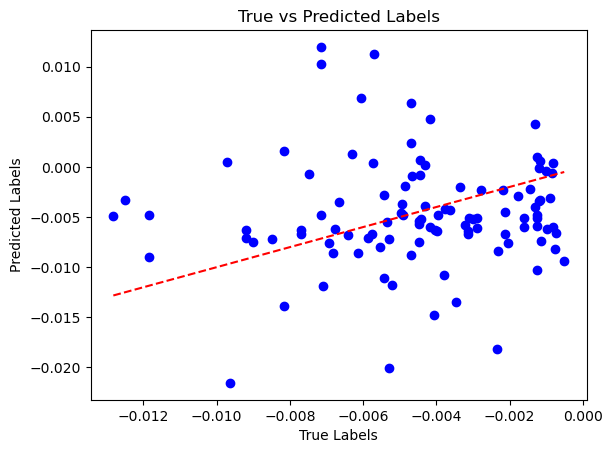

In [18]:
import tensorflow as tf
import keras

#settings

#test set size
test_ratio=0.25

#batch size
batch_size =300



train_ratio=1-test_ratio
train_size=int(train_ratio*len(corr_list))

features=pair_arr
print(features.shape)
labels=np.array(corr_list)



dataset=tf.data.Dataset.from_tensor_slices((features,labels))
dataset = dataset.shuffle(buffer_size=len(corr_list))

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

for data in train_dataset.take(1):
    inpshape=data[0].shape
    print("Feature shape:", data[0].shape)
    print("Label shape:", data[1].shape)

inp_shape=(n**3+4,n**3)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=inp_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(48,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100


/home/stuart/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 1.3344 - mean_absolute_error: 0.4706 - mean_squared_error: 1.3344
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9415 - mean_absolute_error: 1.2951 - mean_squared_error: 2.9415
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3104 - mean_absolute_error: 1.3663 - mean_squared_error: 3.3104
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8279 - mean_absolute_error: 0.6771 - mean_squared_error: 0.8279
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9810 - mean_absolute_error: 0.7545 - mean_squared_error: 0.9810
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9272 - mean_absolute_error: 1.0623 - mean_squared_error: 1.9272
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0326 - mean_absolute_error: 0.1283 - mean_squared_error: 0.0326
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2258 - mean_absolute_error: 0.8261 - mean_squared_error: 1.2258
Epoch 9/100
2/2 ━━━━━━━━━━

2024-07-23 20:00:05.877815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


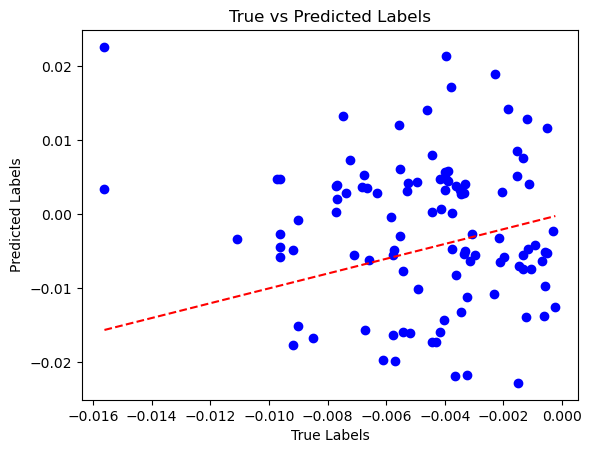

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(48,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - loss: 11.3880 - mean_absolute_error: 0.8444 - mean_squared_error: 11.3880
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.1857 - mean_absolute_error: 3.7425 - mean_squared_error: 24.1857
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9641 - mean_absolute_error: 1.6892 - mean_squared_error: 4.9641
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5680 - mean_absolute_error: 1.2062 - mean_squared_error: 2.5680
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2859 - mean_absolute_error: 0.4050 - mean_squared_error: 0.2859
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7898 - mean_absolute_error: 1.0106 - mean_squared_error: 1.7898
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1660 - mean_absolute_error: 0.3095 - mean_squared_error: 0.1660
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7765 - mean_absolute_error: 0.6603 - mean_squared_error: 0.7765
Epoch 9/50

2024-07-23 20:00:56.978236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


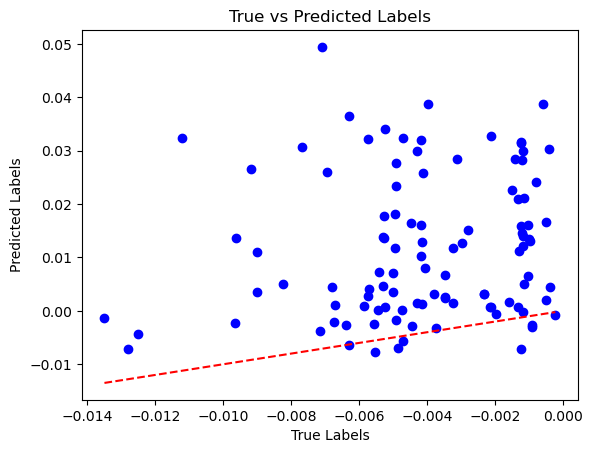

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(1028, activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=500)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - loss: 0.5061 - mean_absolute_error: 0.4853 - mean_squared_error: 0.5061
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7227 - mean_absolute_error: 1.1210 - mean_squared_error: 1.7227
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4626 - mean_absolute_error: 0.6699 - mean_squared_error: 0.4626
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1047 - mean_absolute_error: 0.2864 - mean_squared_error: 0.1047
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0272 - mean_absolute_error: 0.1421 - mean_squared_error: 0.0272
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0395 - mean_absolute_error: 0.1755 - mean_squared_error: 0.0395
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 - mean_absolute_error: 0.1329 - mean_squared_error: 0.0241
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0067
Epoch 9/100
2/

2024-07-23 20:02:12.631433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


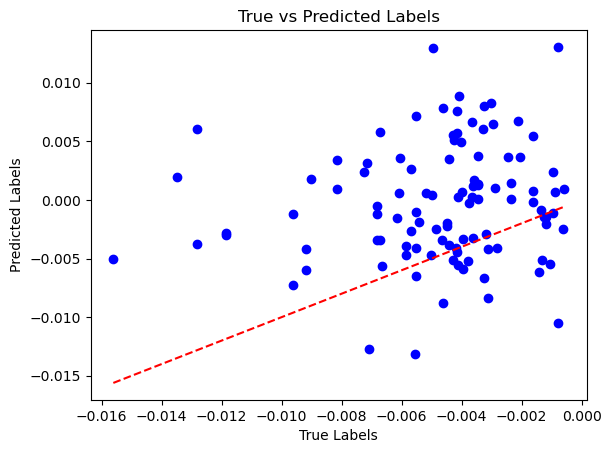

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(48,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 2.6257 - mean_absolute_error: 0.5888 - mean_squared_error: 2.6257
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.7833 - mean_absolute_error: 4.7507 - mean_squared_error: 29.7833
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6314 - mean_absolute_error: 2.0288 - mean_squared_error: 4.6314
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8306 - mean_absolute_error: 0.8273 - mean_squared_error: 0.8306
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9296 - mean_absolute_error: 0.8853 - mean_squared_error: 0.9296
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8226 - mean_absolute_error: 0.8060 - mean_squared_error: 0.8226
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5615 - mean_absolute_error: 0.6654 - mean_squared_error: 0.5615
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3481 - mean_absolute_error: 0.5311 - mean_squared_error: 0.3481
Epoch 9/100


2024-07-23 20:03:03.092371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


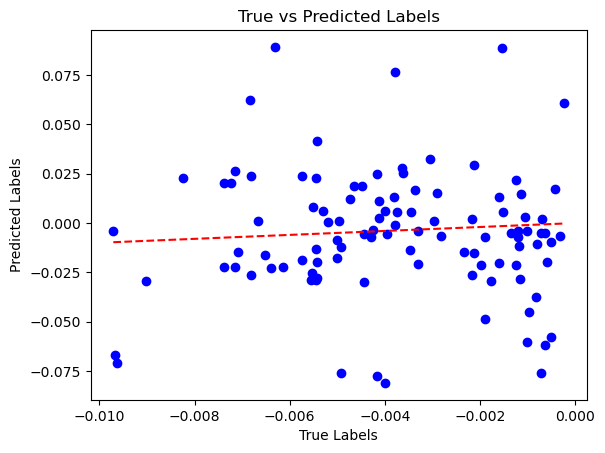

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 0.7042 - mean_absolute_error: 0.7867 - mean_squared_error: 0.7042
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5744 - mean_absolute_error: 1.9618 - mean_squared_error: 6.5744
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3063 - mean_absolute_error: 1.7331 - mean_squared_error: 3.3063
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5878 - mean_absolute_error: 1.2382 - mean_squared_error: 1.5878
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1737 - mean_absolute_error: 0.3700 - mean_squared_error: 0.1737
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1114 - mean_absolute_error: 0.2990 - mean_squared_error: 0.1114
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2210 - mean_absolute_error: 0.4267 - mean_squared_error: 0.2210
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2428 - mean_absolute_error: 0.4620 - mean_squared_error: 0.2428
Epoch 9/100
2/

2024-07-23 20:04:55.117226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


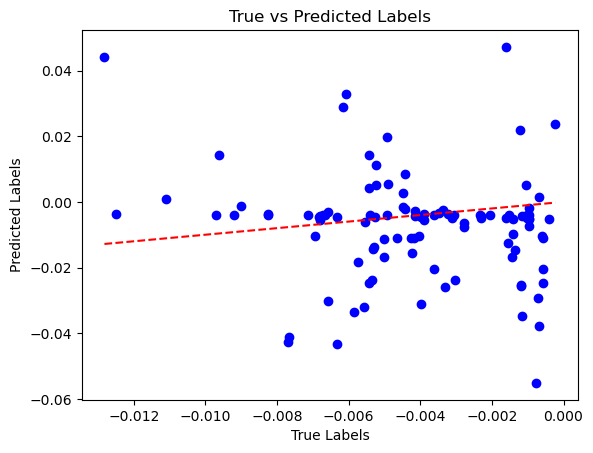

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--') 
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 0.1298 - mean_absolute_error: 0.3449 - mean_squared_error: 0.1298
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1935 - mean_absolute_error: 0.3641 - mean_squared_error: 0.1935
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0897 - mean_squared_error: 0.0109
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0280 - mean_absolute_error: 0.1459 - mean_squared_error: 0.0280
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134 - mean_absolute_error: 0.1072 - mean_squared_error: 0.0134
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - mean_absolute_error: 0.0366 - mean_squared_error: 0.0032
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0067
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - mean_absolute_error: 0.0804 - mean_squared_error: 0.0079
Epoch 9/100
2/

2024-07-23 20:09:13.983114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


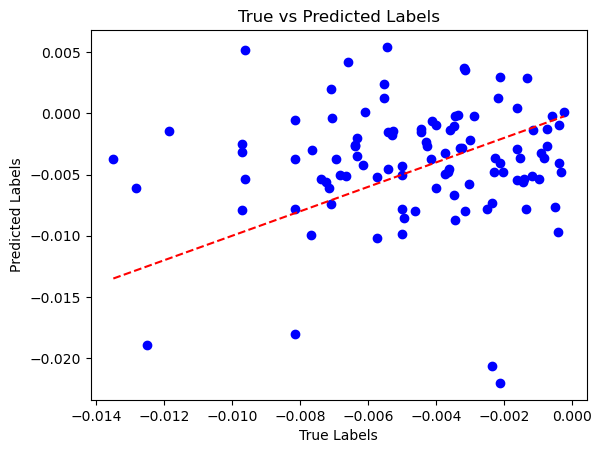

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(48,activation='sigmoid'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - loss: 0.3133 - mean_absolute_error: 0.4827 - mean_squared_error: 0.3133
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5971 - mean_absolute_error: 0.6141 - mean_squared_error: 0.5971
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2112 - mean_absolute_error: 0.4410 - mean_squared_error: 0.2112
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3046 - mean_absolute_error: 0.5424 - mean_squared_error: 0.3046
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0842 - mean_absolute_error: 0.2815 - mean_squared_error: 0.0842
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0461 - mean_absolute_error: 0.1813 - mean_squared_error: 0.0461
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1031 - mean_absolute_error: 0.2785 - mean_squared_error: 0.1031
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0651 - mean_absolute_error: 0.2258 - mean_squared_error: 0.0651
Epoch 9/100
2/

2024-07-23 20:11:19.538534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


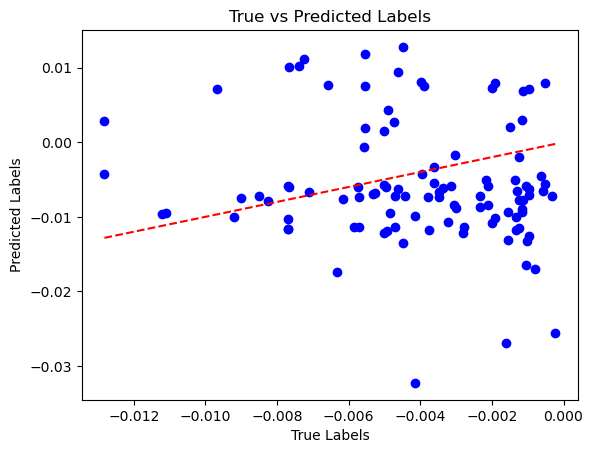

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256,activation='sigmoid'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - loss: 0.8185 - mean_absolute_error: 0.8840 - mean_squared_error: 0.8185
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5154 - mean_absolute_error: 0.6034 - mean_squared_error: 0.5154
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3463 - mean_absolute_error: 0.5831 - mean_squared_error: 0.3463
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1699 - mean_absolute_error: 0.3904 - mean_squared_error: 0.1699
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0833 - mean_absolute_error: 0.2412 - mean_squared_error: 0.0833
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1313 - mean_absolute_error: 0.3259 - mean_squared_error: 0.1313
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0666 - mean_absolute_error: 0.2402 - mean_squared_error: 0.0666
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0931 - mean_squared_error: 0.0109
Epoch 

2024-07-23 20:12:25.291222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


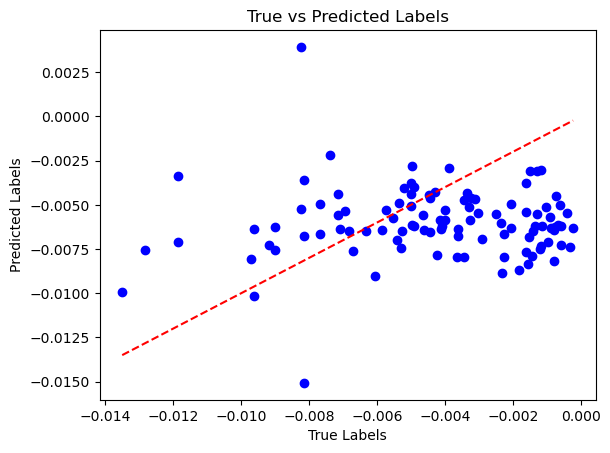

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256,activation='sigmoid'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=1000)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 25.7162 - mean_absolute_error: 0.7577 - mean_squared_error: 25.7162
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2672 - mean_absolute_error: 1.1865 - mean_squared_error: 10.2672
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 242.1101 - mean_absolute_error: 11.5754 - mean_squared_error: 242.1101
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.5011 - mean_absolute_error: 7.8526 - mean_squared_error: 106.5011
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8134 - mean_absolute_error: 0.5483 - mean_squared_error: 0.8134
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6780 - mean_absolute_error: 5.3277 - mean_squared_error: 48.6780
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.6250 - mean_absolute_error: 6.9697 - mean_squared_error: 82.6250
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.6297 - mean_absolute_error: 5.0308 - mean_squared_error: 44.

2024-07-23 20:29:33.003877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


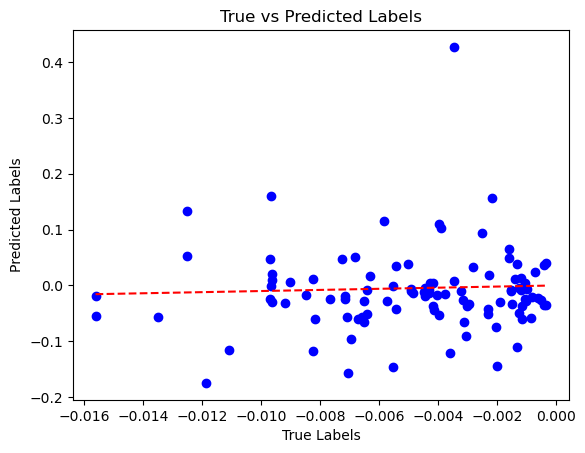

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - loss: 34.4270 - mean_absolute_error: 1.2058 - mean_squared_error: 34.4270
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 310.5237 - mean_absolute_error: 14.6919 - mean_squared_error: 310.5237 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 440.8431 - mean_absolute_error: 19.2175 - mean_squared_error: 440.8431 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.4110 - mean_absolute_error: 3.9125 - mean_squared_error: 16.4110
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3840 - mean_absolute_error: 2.3000 - mean_squared_error: 6.3840
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.7995 - mean_absolute_error: 4.3508 - mean_squared_error: 19.7995
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.7039 - mean_absolute_error: 4.2167 - mean_squared_error: 18.7039
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.2811 - mean_absolute_error: 3.2804 - mean_squared_error: 

2024-07-23 20:30:07.406519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


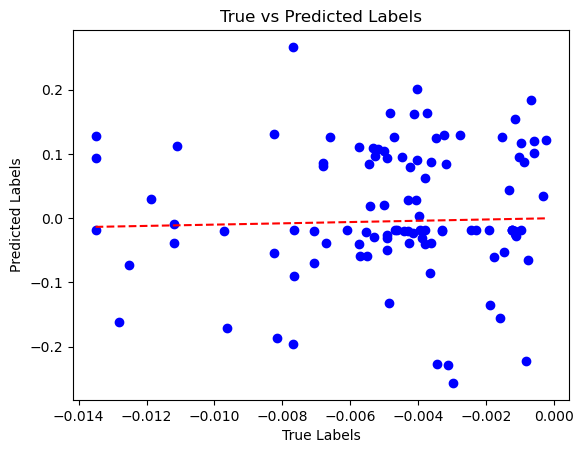

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='tanh'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: 6.1914 - mean_absolute_error: 1.4320 - mean_squared_error: 6.1914
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.5491 - mean_absolute_error: 5.1407 - mean_squared_error: 46.5491 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128.3650 - mean_absolute_error: 9.9451 - mean_squared_error: 128.3650
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.5350 - mean_absolute_error: 3.8680 - mean_squared_error: 16.5350
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1592 - mean_absolute_error: 1.4820 - mean_squared_error: 3.1592
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.1307 - mean_absolute_error: 3.4600 - mean_squared_error: 13.1307
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5961 - mean_absolute_error: 3.2966 - mean_squared_error: 11.5961
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7620 - mean_absolute_error: 2.4899 - mean_squared_error: 6.7620
E

2024-07-23 20:30:20.377568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


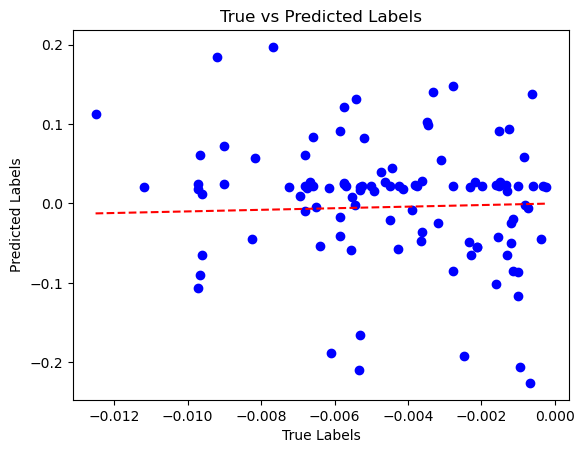

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='sigmoid'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - loss: 2.4539e-05 - mean_absolute_error: 0.0041 - mean_squared_error: 2.4539e-05
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1644e-05 - mean_absolute_error: 0.0027 - mean_squared_error: 1.1644e-05
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2191e-05 - mean_absolute_error: 0.0028 - mean_squared_error: 1.2191e-05
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6152e-06 - mean_absolute_error: 0.0022 - mean_squared_error: 7.6152e-06
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3571e-06 - mean_absolute_error: 0.0023 - mean_squared_error: 9.3571e-06
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7724e-06 - mean_absolute_error: 0.0023 - mean_squared_error: 8.7724e-06
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2590e-06 - mean_absolute_error: 0.0021 - mean_squared_error: 7.2590e-06
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7114e-06 - mean_absolu

2024-07-23 20:31:42.143377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


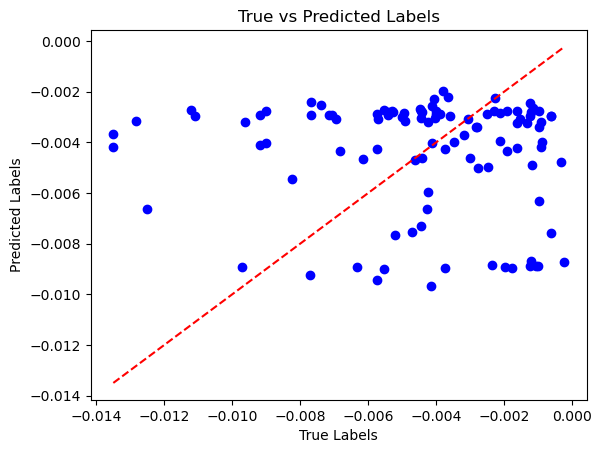

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - loss: 3.2824e-05 - mean_absolute_error: 0.0049 - mean_squared_error: 3.2824e-05
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2799e-05 - mean_absolute_error: 0.0052 - mean_squared_error: 3.2799e-05 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6293e-05 - mean_absolute_error: 0.0031 - mean_squared_error: 1.6293e-05
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8722e-05 - mean_absolute_error: 0.0034 - mean_squared_error: 1.8722e-05
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5386e-06 - mean_absolute_error: 0.0022 - mean_squared_error: 7.5386e-06 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2090e-05 - mean_absolute_error: 0.0029 - mean_squared_error: 1.2090e-05
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2208e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 1.2208e-05
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7323e-06 - mean_abso

2024-07-23 20:32:47.181781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


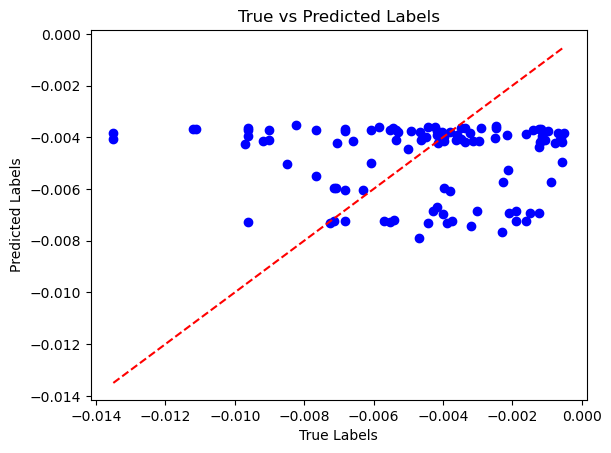

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - loss: 3.3597e-05 - mean_absolute_error: 0.0033 - mean_squared_error: 3.3597e-05
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5662e-05 - mean_absolute_error: 0.0051 - mean_squared_error: 5.5662e-05 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7986e-04 - mean_absolute_error: 0.0190 - mean_squared_error: 3.7986e-04 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3767e-04 - mean_absolute_error: 0.0108 - mean_squared_error: 1.3767e-04
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4631e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 1.4631e-04 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2707e-05 - mean_absolute_error: 0.0067 - mean_squared_error: 5.2707e-05
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7046e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 1.7046e-04
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5322e-06 - mean_abs

2024-07-23 20:33:11.083280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


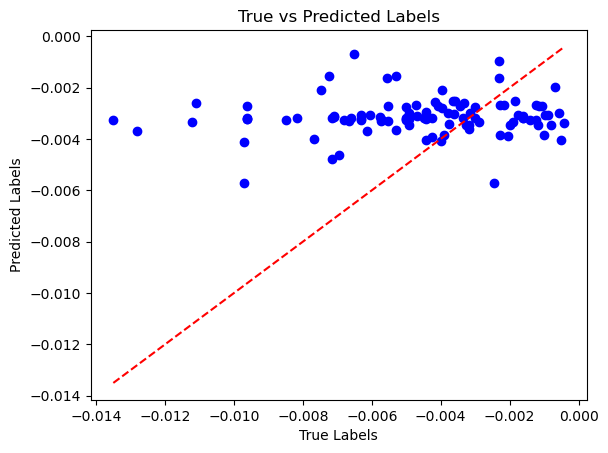

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='tanh'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 363ms/step - loss: 0.0235 - mean_absolute_error: 0.1531 - mean_squared_error: 0.0235
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.1387 - mean_squared_error: 0.0194 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0442 - mean_squared_error: 0.0020
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0954 - mean_squared_error: 0.0092
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6466e-04 - mean_absolute_error: 0.0201 - mean_squared_error: 4.6466e-04
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0796 - mean_squared_error: 0.0063
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3571e-04 - mean_absolute_error: 0.0149 - mean_squared_error: 2.3571e-04
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0574 - mean_squared_error: 0.00

2024-07-23 20:33:26.908423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


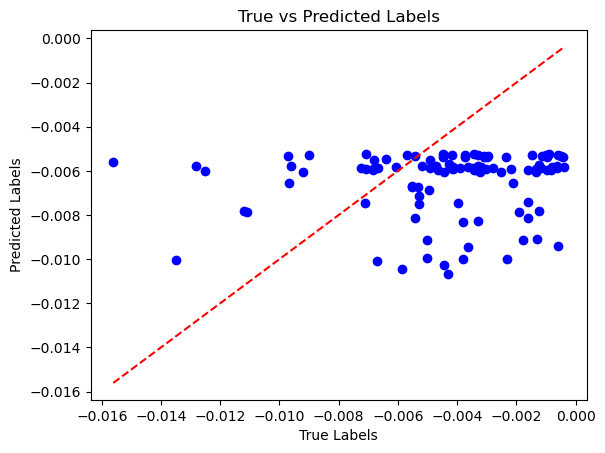

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='sigmoid'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - loss: 7.0100e-05 - mean_absolute_error: 0.0057 - mean_squared_error: 7.0100e-05
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3291e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 3.3291e-05 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9044e-04 - mean_absolute_error: 0.0218 - mean_squared_error: 4.9044e-04
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2994e-04 - mean_absolute_error: 0.0102 - mean_squared_error: 2.2994e-04
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2020e-05 - mean_absolute_error: 0.0085 - mean_squared_error: 9.2020e-05
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5798e-04 - mean_absolute_error: 0.0079 - mean_squared_error: 1.5798e-04
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9590e-05 - mean_absolute_error: 0.0041 - mean_squared_error: 2.9590e-05
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6838e-05 - mean_absol

2024-07-23 20:34:51.163288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


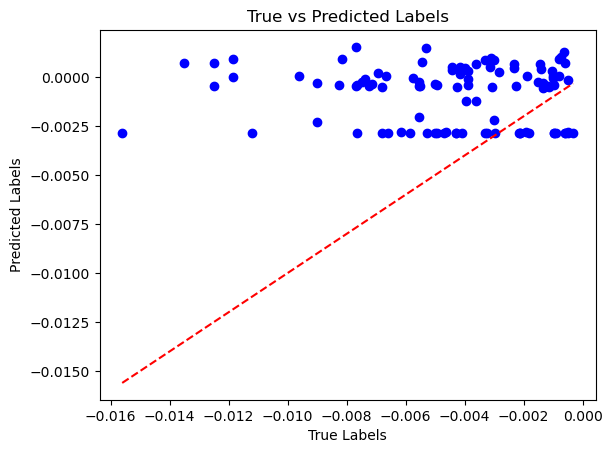

In [68]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='selu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - loss: 3.1805 - mean_absolute_error: 1.7814 - mean_squared_error: 3.1805
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4296 - mean_absolute_error: 0.6508 - mean_squared_error: 0.4296 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0933 - mean_absolute_error: 0.3008 - mean_squared_error: 0.0933
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6465 - mean_absolute_error: 0.8039 - mean_squared_error: 0.6465
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6706 - mean_absolute_error: 0.8187 - mean_squared_error: 0.6706
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2803 - mean_absolute_error: 0.5284 - mean_squared_error: 0.2803
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.1210 - mean_squared_error: 0.0154
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0691 - mean_absolute_error: 0.2593 - mean_squared_error: 0.0691 
Epoch 9/100


2024-07-23 20:37:16.876734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


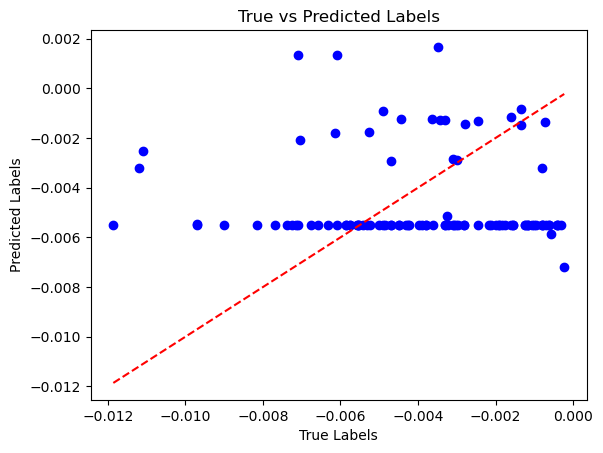

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='exponential'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - loss: 1054.7357 - mean_absolute_error: 20.7842 - mean_squared_error: 1054.7357
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3083.0276 - mean_absolute_error: 54.9476 - mean_squared_error: 3083.0276 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3747.7881 - mean_absolute_error: 58.7793 - mean_squared_error: 3747.7881
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1604.5315 - mean_absolute_error: 39.1372 - mean_squared_error: 1604.5315
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.8402 - mean_absolute_error: 4.5384 - mean_squared_error: 26.8402
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 645.1610 - mean_absolute_error: 22.0240 - mean_squared_error: 645.1610
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 405.6806 - mean_absolute_error: 17.6040 - mean_squared_error: 405.6806
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0389 - mean_absolute_error: 2.6304 -

2024-07-23 20:38:02.797501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


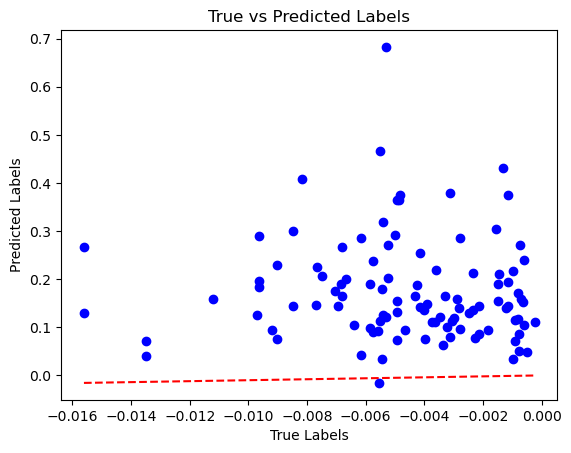

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='log_softmax'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 397ms/step - loss: 1.5045e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 1.5045e-04
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3131e-05 - mean_absolute_error: 0.0074 - mean_squared_error: 9.3131e-05
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9593e-05 - mean_absolute_error: 0.0050 - mean_squared_error: 3.9593e-05
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4338e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 1.4338e-05
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5128e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 1.5128e-05
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6113e-05 - mean_absolute_error: 0.0032 - mean_squared_error: 1.6113e-05
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1754e-05 - mean_absolute_error: 0.0027 - mean_squared_error: 1.1754e-05
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3871e-05 - mean_absolu

2024-07-23 20:38:53.008980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


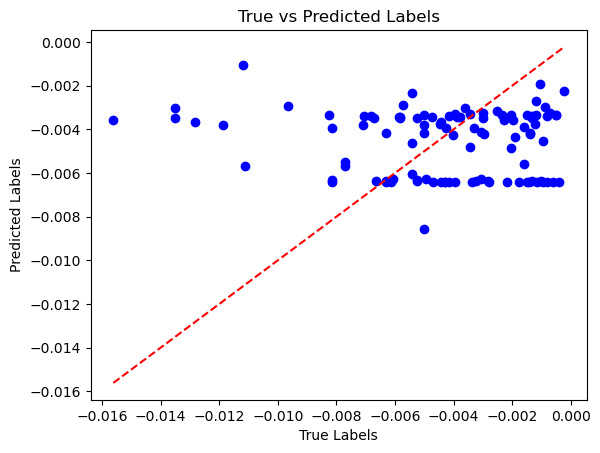

In [71]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(500, activation='softmax'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - loss: 2.5453e-05 - mean_absolute_error: 0.0040 - mean_squared_error: 2.5453e-05
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5608e-06 - mean_absolute_error: 0.0025 - mean_squared_error: 9.5608e-06 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7502e-05 - mean_absolute_error: 0.0031 - mean_squared_error: 1.7502e-05
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0023e-05 - mean_absolute_error: 0.0024 - mean_squared_error: 1.0023e-05
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7628e-06 - mean_absolute_error: 0.0024 - mean_squared_error: 8.7628e-06
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0778e-05 - mean_absolute_error: 0.0028 - mean_squared_error: 1.0778e-05
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7051e-06 - mean_absolute_error: 0.0024 - mean_squared_error: 8.7051e-06
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1264e-06 - mean_absol

2024-07-23 20:39:39.072562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


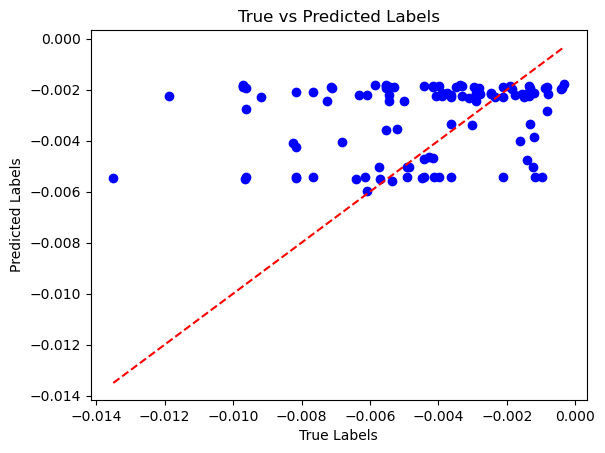

In [73]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - loss: 0.9214 - mean_absolute_error: 0.3381 - mean_squared_error: 0.9214
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4294 - mean_absolute_error: 1.1406 - mean_squared_error: 1.4294 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1270 - mean_absolute_error: 0.3466 - mean_squared_error: 0.1270
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0385 - mean_squared_error: 0.0016 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6989e-04 - mean_absolute_error: 0.0100 - mean_squared_error: 1.6989e-04
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9126e-05 - mean_absolute_error: 0.0071 - mean_squared_error: 8.9126e-05
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5381e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 1.5381e-05 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0993e-05 - mean_absolute_error: 0.0025 - mean_squar

2024-07-23 20:40:33.125185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


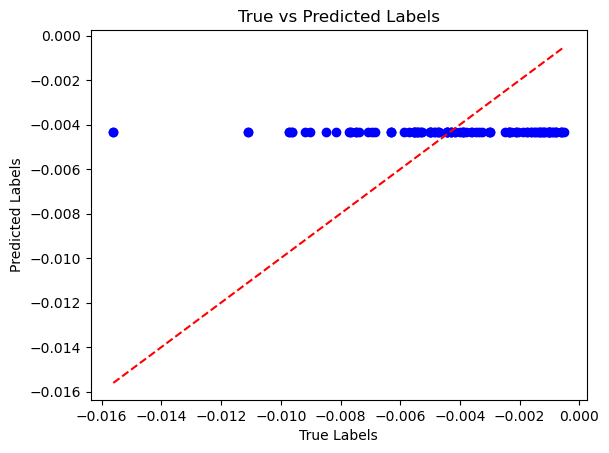

In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='tanh'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - loss: 2.6791 - mean_absolute_error: 1.6368 - mean_squared_error: 2.6791
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2197 - mean_absolute_error: 1.4898 - mean_squared_error: 2.2197 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7672 - mean_absolute_error: 1.3291 - mean_squared_error: 1.7672
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3294 - mean_absolute_error: 1.1526 - mean_squared_error: 1.3294
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9221 - mean_absolute_error: 0.9597 - mean_squared_error: 0.9221
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5640 - mean_absolute_error: 0.7499 - mean_squared_error: 0.5640
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2736 - mean_absolute_error: 0.5208 - mean_squared_error: 0.2736
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0803 - mean_absolute_error: 0.2775 - mean_squared_error: 0.0803
Epoch 9/100
2

2024-07-23 20:41:10.514638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


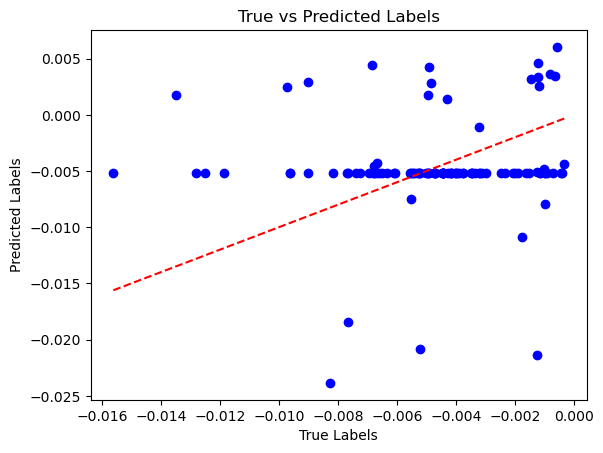

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(32,activation='exponential'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - loss: 0.0471 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0471
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0265 - mean_absolute_error: 0.1625 - mean_squared_error: 0.0265 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.1034 - mean_squared_error: 0.0108 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0404 - mean_squared_error: 0.0019 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7848e-04 - mean_absolute_error: 0.0220 - mean_squared_error: 7.7848e-04 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0563 - mean_squared_error: 0.0035 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0657 - mean_squared_error: 0.0044 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0562 - mean_squared_error: 0.0032 

2024-07-23 20:41:27.829355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


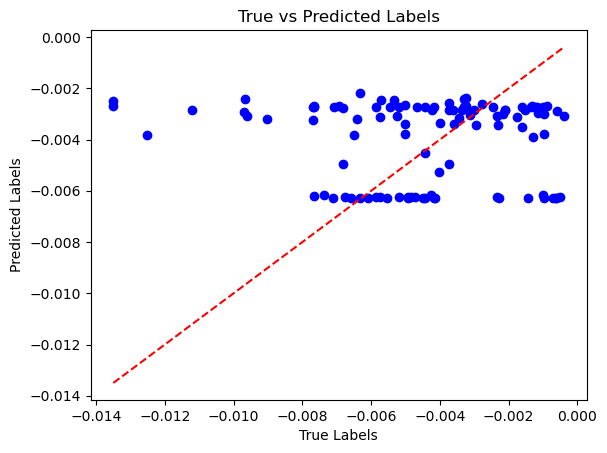

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='softmax'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(32,activation='sigmoid'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - loss: 2.0116 - mean_absolute_error: 0.2986 - mean_squared_error: 2.0116
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0616 - mean_absolute_error: 1.3188 - mean_squared_error: 2.0616 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4598 - mean_absolute_error: 0.6048 - mean_squared_error: 0.4598
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0772 - mean_absolute_error: 0.2758 - mean_squared_error: 0.0772 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0761 - mean_squared_error: 0.0081
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0303 - mean_absolute_error: 0.1469 - mean_squared_error: 0.0303 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0672 - mean_absolute_error: 0.2348 - mean_squared_error: 0.0672
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0668 - mean_squared_error: 0.0056 
Epoch 9/10

2024-07-23 20:43:25.654623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


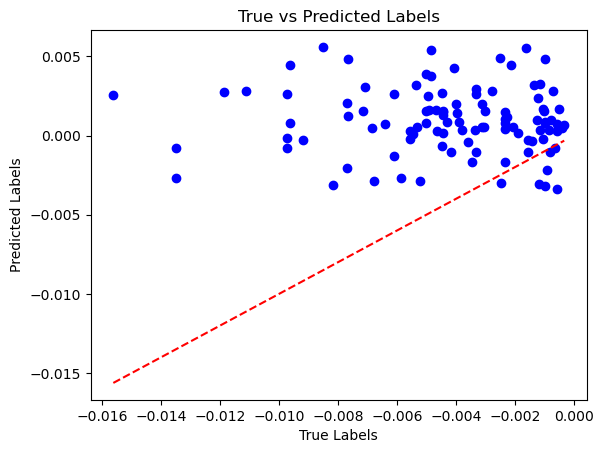

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='tanh'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - loss: 2.8002 - mean_absolute_error: 1.6618 - mean_squared_error: 2.8002
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3286 - mean_absolute_error: 1.5054 - mean_squared_error: 2.3286 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4842 - mean_absolute_error: 1.1905 - mean_squared_error: 1.4842 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6259 - mean_absolute_error: 0.7736 - mean_squared_error: 0.6259 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0933 - mean_squared_error: 0.0240
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6411 - mean_absolute_error: 0.7873 - mean_squared_error: 0.6411
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4693 - mean_absolute_error: 0.6821 - mean_squared_error: 0.4693
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0458 - mean_absolute_error: 0.1704 - mean_squared_error: 0.0458
Epoch 9/100

2024-07-23 22:49:11.210855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


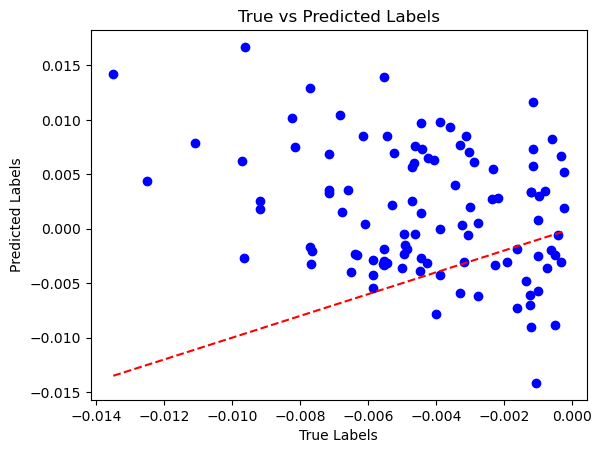

In [78]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68,64)),
    keras.layers.Dense(2000, activation='sigmoid'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(train_dataset,epochs=100)
model.evaluate(test_dataset)

model.save('new.keras')

predictions = model.predict(test_dataset)

import matplotlib as mpl
import matplotlib.pyplot as plt

test_labels = []
for features, labels in test_dataset:
    test_labels.append(labels.numpy())
test_labels = np.concatenate(test_labels, axis=0)
plt.scatter(test_labels, predictions, c='blue')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Line for y=x
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()